# Asuransi Kesehatan

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
import seaborn as sns
import re
import matplotlib.dates as mdates
from datetime import datetime
import statsmodels.api as sm
from scipy import stats
sns.set()
sns.set_context('talk')

## Load dataset

In [2]:
df_insurance = pd.read_csv('insurance.csv')
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Analisa deskriptif statistik

Rata-rata umur pengguna adalah 39.2 tahun

In [3]:
df_insurance.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

Modus umur pengguna adalah 18

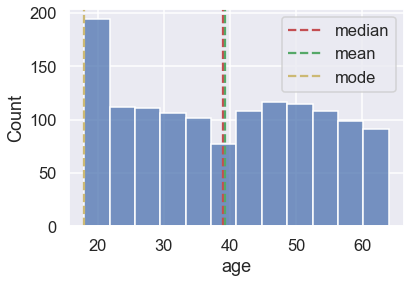

In [109]:
# df_insurance.age.plot.hist(bins=np.arange(16,66,1))
sns.histplot(df_insurance.age)
plt.xlabel('age')
plt.axvline(df_insurance.age.median(),color='r',ls='--',label='median')
plt.axvline(df_insurance.age.mean(),color='g',ls='--',label='mean')
plt.axvline(df_insurance.age.mode()[0],color='y',ls='--',label='mode')
plt.legend()
plt.show()

Rata-rata tagihan pengguna adalah 13270

In [104]:
df_insurance.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [110]:
df_insurance.charges.mode()

0    1639.5631
dtype: float64

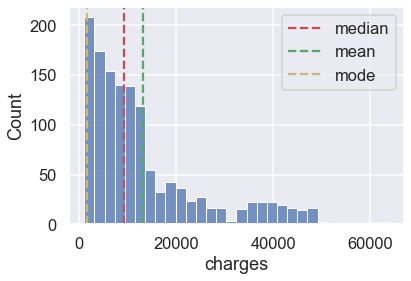

In [106]:
sns.histplot(df_insurance.charges)
plt.xlabel('charges')
plt.axvline(df_insurance.charges.median(),color='r',ls='--',label='median')
plt.axvline(df_insurance.charges.mean(),color='g',ls='--',label='mean')
plt.axvline(df_insurance.charges.mode()[0],color='y',ls='--',label='mode')
plt.legend()
plt.show()

In [ ]:
df_insurance.age.plot.hist(bins=np.arange(16,66,1))
plt.xlabel('age')
plt.axvline(df_insurance.age.median(),color='r',ls='--',label='median')
plt.axvline(df_insurance.age.mean(),color='g',ls='--',label='mean')
plt.axvline(df_insurance.age.mode()[0],color='y',ls='--',label='mode')
plt.legend()
plt.show()

BMI dari perokok dan bukan perokok relatif sama

In [134]:
df_insurance.bmi.mean()

30.66339686098655

In [6]:
df_insurance.groupby(['smoker']).bmi.mean()

smoker
no     30.651795
yes    30.708449
Name: bmi, dtype: float64

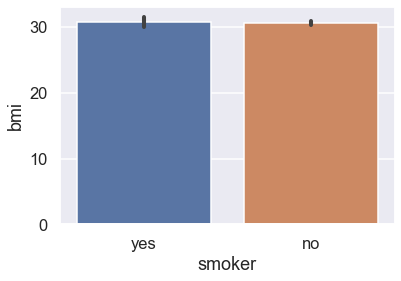

In [114]:
sns.barplot(data=df_insurance, x='smoker', y='bmi')
plt.show()

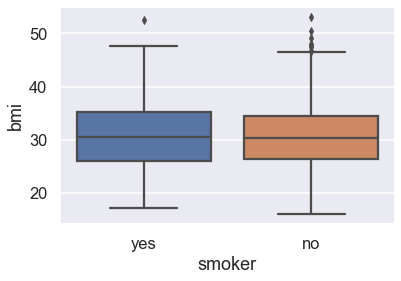

In [135]:
sns.boxplot(data=df_insurance,x='smoker',y='bmi')
plt.show()

Rata-rata umur perokok dan bukan perokok relatif tidak berbeda jauh

In [116]:
round(df_insurance.groupby(['smoker']).age.mean(),2)

smoker
no     39.39
yes    38.51
Name: age, dtype: float64

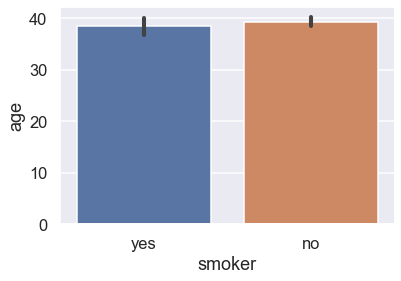

In [115]:
sns.barplot(data=df_insurance, x='smoker', y='age')
plt.show()

Perokok memiliki rata-rata tagihan asuransi hampir 4x non-perokok. Nilai paling kecil dari tagihan perokok hanya sedikit lebih besar dari tagihan 75% non-perokok. Selain itu, sebaran data tagihan perokok lebih besar dibanding non-perokok.

In [10]:
df_insurance.groupby(['smoker'])['charges'].mean()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

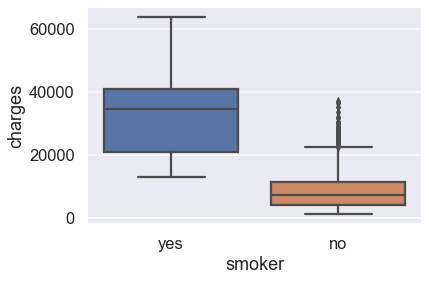

In [132]:
sns.boxplot(data=df_insurance,x='smoker',y='charges')
plt.show()

Rata-rata umur laki-laki dan perempuan perokok sama yaitu 38 tahun

In [12]:
df_insurance[df_insurance.smoker=='yes'].groupby(['sex']).age.mean()

sex
female    38.608696
male      38.446541
Name: age, dtype: float64

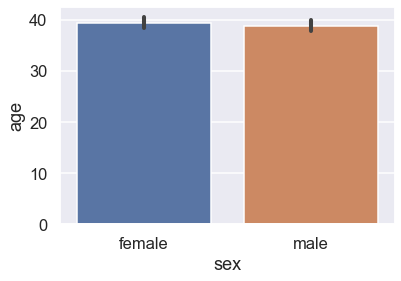

In [118]:
sns.barplot(data=df_insurance, x='sex', y='age')
plt.show()

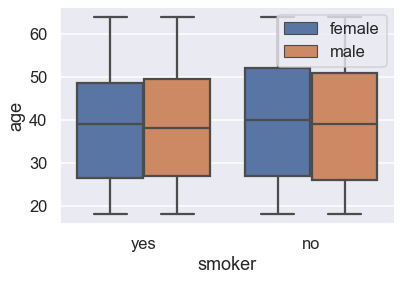

In [131]:
sns.boxplot(data=df_insurance,x='smoker',y='age',hue='sex')
plt.legend(loc='upper right')
plt.show()

Di antara pengguna dengan BMI di atas 25, pengguna yang juga seorang perokok memiliki tagihan yang lebih besar dibanding pengguna yang non-perokok. Terdapat lonjakan tagihan untuk perokok dengan BMI sekitar 30 ke atas.

Text(0.5, 1.0, 'BMI > 25')

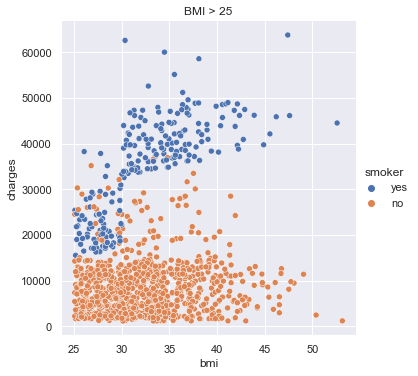

In [14]:
sns.relplot(data=df_insurance[df_insurance.bmi>25], x='bmi', y='charges', hue='smoker')
plt.title('BMI > 25')

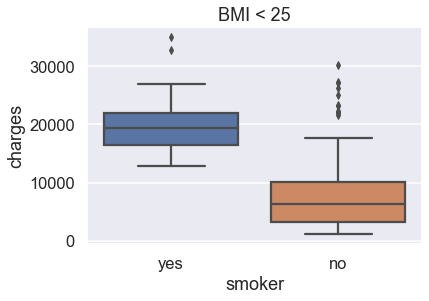

In [139]:
sns.boxplot(data=df_insurance[df_insurance.bmi<25].sort_values('smoker',ascending=False),x='smoker',y='charges')
plt.title('BMI < 25')
plt.show()

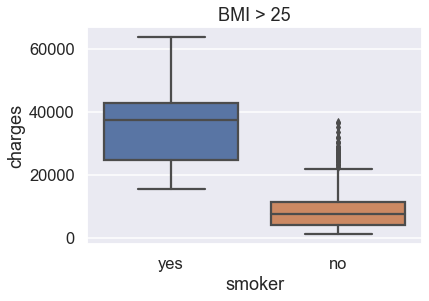

In [130]:
sns.boxplot(data=df_insurance[df_insurance.bmi>25],x='smoker',y='charges')
plt.title('BMI > 25')
plt.show()

In [140]:
def label_bmi_2(bmi):
    label = ''
    if bmi > 25: label = 'BMI > 25'
    else: label = 'BMI < 25'
    return label

df_insurance['label_bmi_2'] = df_insurance.bmi.apply(label_bmi_2)

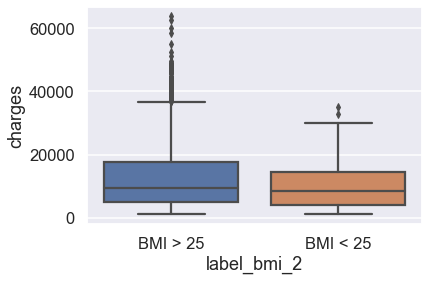

In [141]:
sns.boxplot(data=df_insurance,x='label_bmi_2',y='charges')
# plt.title('BMI')
plt.show()

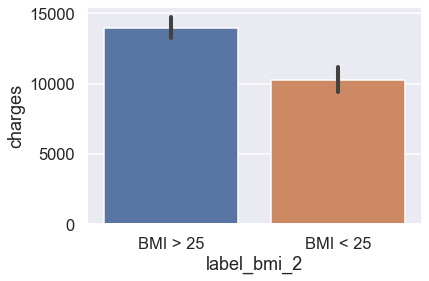

In [142]:
sns.barplot(data=df_insurance, x='label_bmi_2', y='charges')
plt.show()

In [144]:
df_insurance[df_insurance.bmi<25].groupby(['smoker'])['charges'].mean()

smoker
no      7515.708891
yes    19839.278309
Name: charges, dtype: float64

In [143]:
df_insurance[df_insurance.bmi>25].groupby(['smoker'])['charges'].mean()

smoker
no      8629.589610
yes    35116.909657
Name: charges, dtype: float64

BMI laki-laki dan perempuan relatif sama, walau sebaran BMI laki-laki agak lebih besar dibanding perempuan.

In [15]:
df_insurance.groupby(['sex']).bmi.mean()

sex
female    30.377749
male      30.943129
Name: bmi, dtype: float64

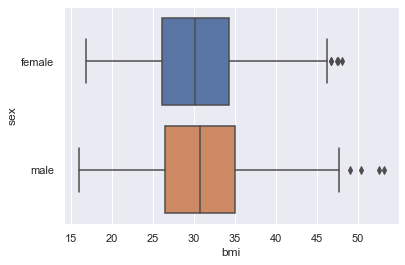

In [16]:
sns.boxplot(data=df_insurance,x='bmi',y='sex')
plt.show()

Tagihan untuk pengguna yang memiliki anak sedikit lebih besar dari pengguna yang tidak memiliki anak

In [124]:
def label_children(children):
    label = ''
    if children == 0: label = 'no children'
    else: label = 'have children'
    return label

In [125]:
df_insurance['label_children'] = df_insurance.children.apply(label_children)

In [126]:
df_insurance.groupby(['label_children']).charges.mean()

label_children
have children    13949.941093
no children      12365.975602
Name: charges, dtype: float64

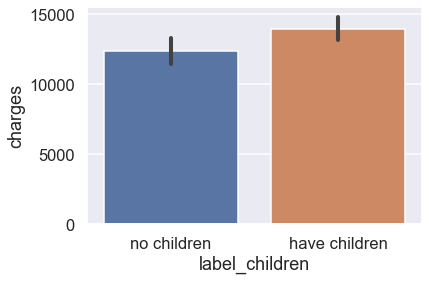

In [127]:
sns.barplot(data=df_insurance, x='label_children', y='charges')
plt.show()

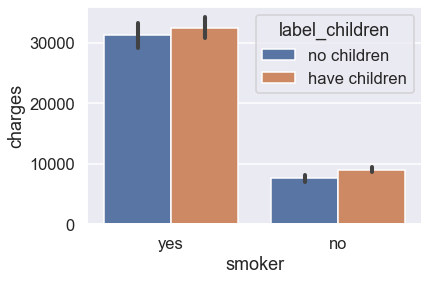

In [128]:
sns.barplot(data=df_insurance, x='smoker', y='charges', hue='label_children')
plt.show()

## Analisa variabel kategorik (PMF)

Laki-laki memiliki rata-rata tagihan yang lebih besar dibanding perempuan dengan sebaran yang lebih besar pula. Hal ini mungkin disebabkan lebih banyak proporsi perokok di antara pengguna laki-laki dari proporsi perokok di antara pengguna perempuan.

In [17]:
df_insurance.groupby(['sex']).charges.mean()

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

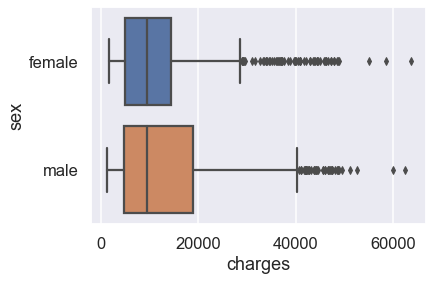

In [145]:
sns.boxplot(data=df_insurance,x='charges',y='sex')
plt.show()

<AxesSubplot:xlabel='sex', ylabel='Count'>

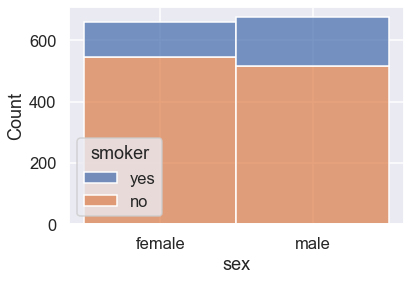

In [146]:
sns.histplot(df_insurance, x ='sex', hue='smoker', multiple = "stack")

In [147]:
df_insurance[df_insurance.sex=='male'].smoker.value_counts(normalize=True)

no     0.764793
yes    0.235207
Name: smoker, dtype: float64

In [148]:
df_insurance[df_insurance.sex=='female'].smoker.value_counts(normalize=True)

no     0.826284
yes    0.173716
Name: smoker, dtype: float64

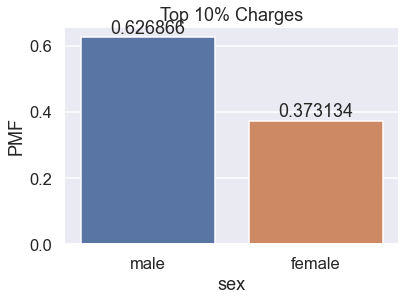

In [157]:
ax=sns.barplot(data=df_insurance[df_insurance.charges>np.percentile(df_insurance.charges,90)].sex.value_counts(normalize=True).to_frame().reset_index(),x='index',y='sex')
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel('sex')
plt.ylabel('PMF')
plt.title('Top 10% Charges')
# plt.tight_layout()
plt.show()

Southeast region memiliki peluang sebagai daerah asal pengguna asuransi lebih besar dibandingkan region lainnya yaitu 0.27, sedangkan region sisanya memiliki peluang yang serupa yaitu masing-masing sebesar 0.24.

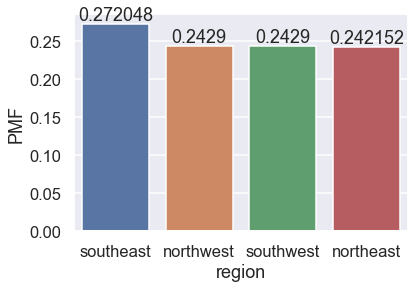

In [158]:
ax=sns.barplot(data=df_insurance.region.value_counts(normalize=True).to_frame().reset_index(),x='index',y='region')
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel('region')
plt.ylabel('PMF')
plt.show()

Orang yang tidak memiliki anak memiliki peluang yang lebih besar sebagai pengguna asuransi dibanding orang yang memiliki anak 1, 2, 3, 4, dan 5, namun proporsi pengguna yang memiliki anak (1 atau lebih) lebih besar dibanding yang tidak memiliki anak.

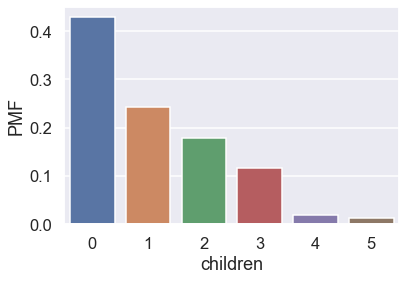

In [160]:
ax=sns.barplot(data=df_insurance.children.value_counts(normalize=True).to_frame().reset_index(),x='index',y='children')
# for i in ax.containers:
#     ax.bar_label(i,)
plt.xlabel('children')
plt.ylabel('PMF')
plt.show()

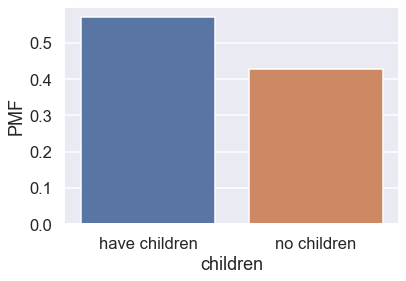

In [162]:
ax=sns.barplot(data=df_insurance.label_children.value_counts(normalize=True).to_frame().reset_index(),x='index',y='label_children')
# for i in ax.containers:
#     ax.bar_label(i,)
plt.xlabel('children')
plt.ylabel('PMF')
plt.show()

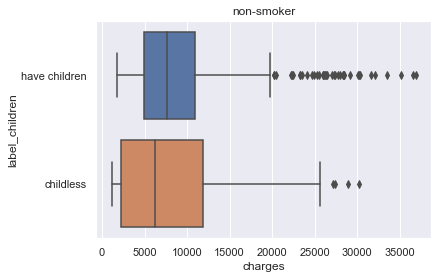

In [80]:
sns.boxplot(data=df_insurance[df_insurance.smoker=='no'],x='charges',y='label_children')
plt.title('non-smoker')
plt.show()

Proporsi pengguna non-perokok hampir empat kali lebih besar dibandingkan perokok

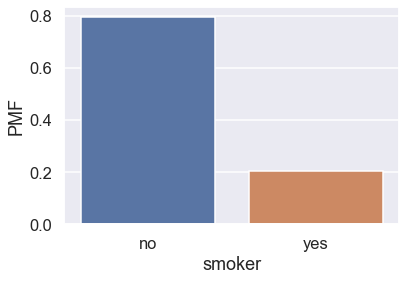

In [164]:
ax=sns.barplot(data=df_insurance.smoker.value_counts(normalize=True).to_frame().reset_index(),x='index',y='smoker')
# for i in ax.containers:
#     ax.bar_label(i,)
plt.xlabel('smoker')
plt.ylabel('PMF')
plt.show()

Peluang seorang pengguna adalah laki-laki diketahui dia adalah seorang perokok adalah sebesar 0.58, lebih besar dari perempuan

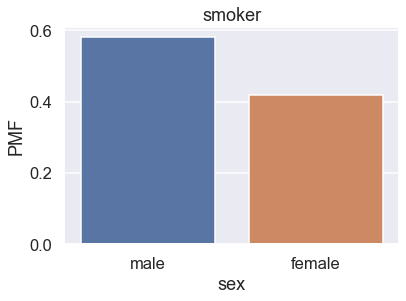

In [166]:
ax=sns.barplot(data=df_insurance[df_insurance.smoker=='yes'].sex.value_counts(normalize=True).to_frame().reset_index(),x='index',y='sex')
plt.xlabel('sex')
plt.ylabel('PMF')
# for i in ax.containers:
#     ax.bar_label(i,)
plt.title('smoker')
plt.show()

Bentuk distribusi tagihan untuk tiap-tiap region relatif serupa, dimana nilai tagihan paling banyak berada di bawah 15000

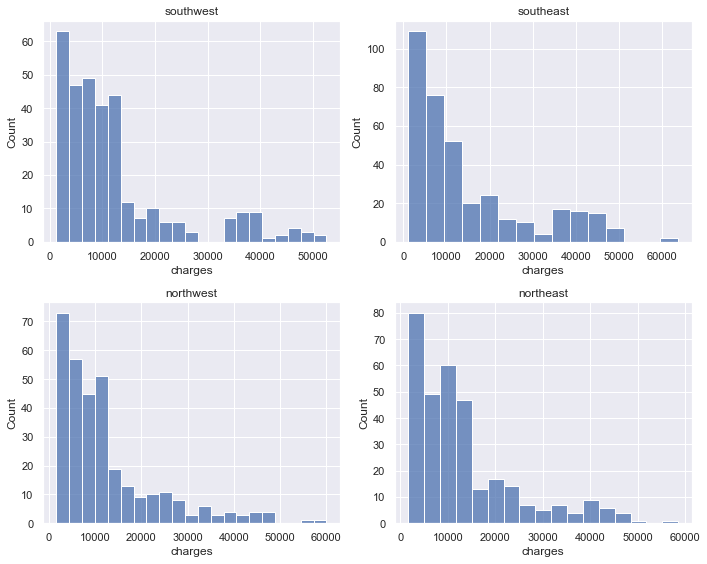

In [23]:
fig,ax = plt.subplots(2,2,figsize=(10,8))
for i,reg in enumerate(df_insurance.region.unique()):
    plt.subplot(2,2,i+1)
    sns.histplot(data=df_insurance[df_insurance.region==reg],x='charges')
    plt.title(reg)
plt.tight_layout()

## Analisa variabel kontinu (CDF)

Diketahui kategori BMI menurut [CDC](https://www.cdc.gov/obesity/basics/adult-defining.html#:~:text=If%20your%20BMI%20is%20less,falls%20within%20the%20obesity%20range.) untuk orang dewasa sebagai berikut:
- BMI di bawah 18.5 -> `underweight`
- BMI antara 18.5 dan 25 -> `healthy`
- BMI antara 25 dan 30 -> `overweight`
- BMI di atas 30 -> `obese`

Untuk penyederhanaan masalah, kita akan mengelompokkan BMI di bawah 25 menjadi kelompok `not overweight`

In [24]:
def label_bmi(bmi):
    label = ''
    if bmi>=30: label='obese'
    elif bmi>=25: label='overweight'
    else: label='not overweight'
    return label

In [25]:
df_insurance['label_bmi'] = df_insurance.bmi.apply(label_bmi)

Untuk pengguna yang obesitas, 80% pengguna memiliki tagihan sebesar 1.84 kali tagihan pengguna yang overweight dan hampir 2 kali tagihan pengguna yang memiliki BMI tidak overweight

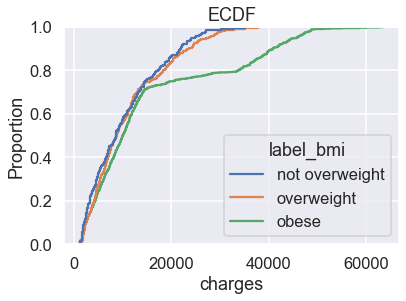

In [168]:
sns.ecdfplot(data=df_insurance.sort_values('bmi'), x='charges', hue='label_bmi')
plt.title('ECDF')
plt.show()

In [27]:
for i in df_insurance.label_bmi.unique():
    print(f"{i}: {round(np.percentile(df_insurance[df_insurance.label_bmi==i].charges,80),2)}")

overweight: 18310.74
obese: 33746.77
not overweight: 17215.97


Peluang pengguna dengan BMI di atas 25 dan juga seorang perokok memiliki tagihan di atas 16700 adalah sebesar 98.17%

In [28]:
len(df_insurance[(df_insurance.bmi>25)&(df_insurance.smoker=='yes')&(df_insurance.charges>16700)])/len(df_insurance[(df_insurance.bmi>25)&(df_insurance.smoker=='yes')])

0.9817351598173516

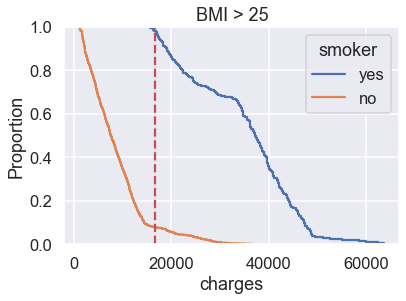

In [208]:
g=sns.ecdfplot(data=df_insurance[df_insurance.bmi>25], x='charges', hue='smoker', complementary=True)
plt.axvline(16700,color='r',ls='--',label='16.7k')
plt.title('BMI > 25')
# plt.legend()
plt.show()

Pengguna memiliki peluang yang lebih besar untuk memiliki tagihan tinggi (top 20% charges) jika ia adalah seorang perokok dibanding seorang yang overweight


In [209]:
len(df_insurance[(df_insurance.smoker=='yes')&(df_insurance.charges>top20_charges)])/len(df_insurance[(df_insurance.smoker=='yes')])

0.7591240875912408

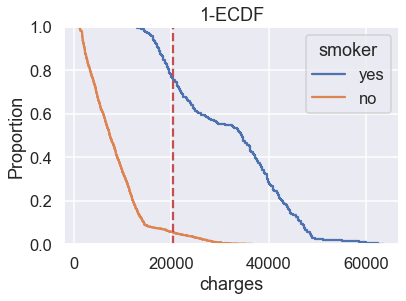

In [211]:
g=sns.ecdfplot(data=df_insurance, x='charges', hue='smoker', complementary=True)
plt.axvline(top20_charges,color='r',ls='--',label='20.26k')
plt.title('1-ECDF')
# plt.legend()
plt.show()

In [210]:
len(df_insurance[(df_insurance.bmi>25)&(df_insurance.charges>top20_charges)])/len(df_insurance[(df_insurance.bmi>25)])

0.21631530705774518

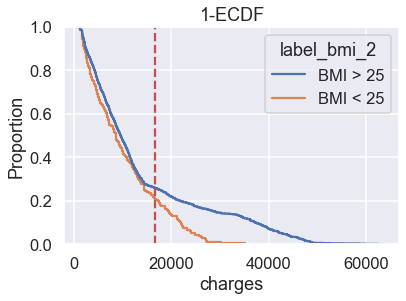

In [212]:
g=sns.ecdfplot(data=df_insurance, x='charges', hue='label_bmi_2', complementary=True)
plt.axvline(16700,color='r',ls='--',label='16.7k')
plt.title('1-ECDF')
# plt.legend()
plt.show()

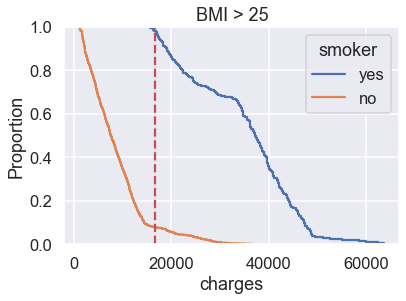

Seorang pengguna asuransi lebih mungkin memiliki BMI yang tinggi (> 25) jika diketahui dia memiiki tagihan yang tinggi (> 16.7k) dibanding peluang dia memiliki tagihan yang tinggi diketahui dia memiliki BMI yang tinggi

In [197]:
top20_charges = np.percentile(df_insurance.charges,80)
top20_charges

20260.626406000003

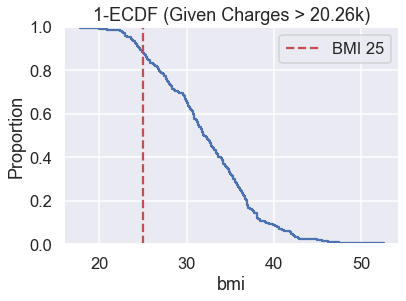

In [198]:
g=sns.ecdfplot(data=df_insurance[df_insurance.charges>top20_charges], x='bmi', complementary=True)
plt.axvline(25,color='r',ls='--',label='BMI 25')
plt.title('1-ECDF (Given Charges > 20.26k)')
plt.legend()
plt.show()

In [199]:
len(df_insurance[(df_insurance.bmi>25)&(df_insurance.charges>top20_charges)])/len(df_insurance[(df_insurance.charges>top20_charges)])

0.8805970149253731

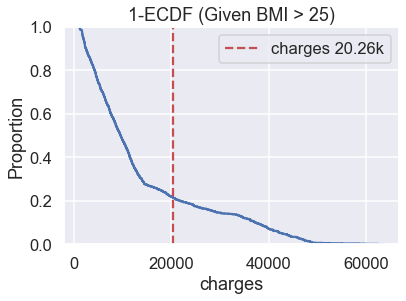

In [200]:
g=sns.ecdfplot(data=df_insurance[df_insurance.bmi>25], x='charges', complementary=True)
plt.axvline(top20_charges,color='r',ls='--',label='charges 20.26k')
plt.title('1-ECDF (Given BMI > 25)')
plt.legend()
plt.show()

In [201]:
len(df_insurance[(df_insurance.bmi>25)&(df_insurance.charges>top20_charges)])/len(df_insurance[(df_insurance.bmi>25)])

0.21631530705774518

Peluang ditemukannya seorang pengguna secara acak yang memiliki tagihan di atas 16700 jika diketahui dia adalah perokok adalah sebesar 92.7%. Peluang ini tidak jauh berbeda dengan peluang orang yang memiliki tagihan di atas 16700 jika diketahui ia adalah seorang perokok yang overweight.

In [30]:
len(df_insurance[(df_insurance.smoker=='yes')&(df_insurance.charges>16700)])/len(df_insurance[(df_insurance.smoker=='yes')])

0.927007299270073

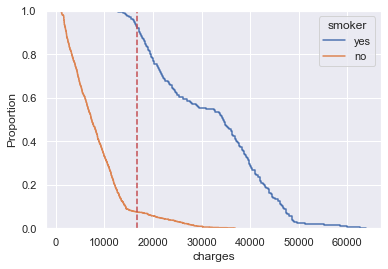

In [31]:
g=sns.ecdfplot(data=df_insurance, x='charges', hue='smoker', complementary=True)
plt.axvline(16700,color='r',ls='--')
plt.show()

Seseorang dengan BMI di atas 25 memiliki peluang lebih besar untuk memiliki tagihan di atas 16700 dibanding seseorang yang memiliki BMI di bawah 25

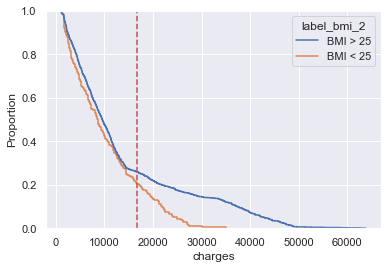

In [34]:
g=sns.ecdfplot(data=df_insurance, x='charges', hue='label_bmi_2', complementary=True)
plt.axvline(16700,color='r',ls='--')
plt.show()

In [213]:
df_insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'label_bmi', 'label_bmi_2', 'label_children'],
      dtype='object')

Di antara pengguna dengan BMI di atas 25 pengguna perokok berpeluang jauh lebih besar untuk memiliki tagihan di atas 16700 dari pengguna yang tidak merokok

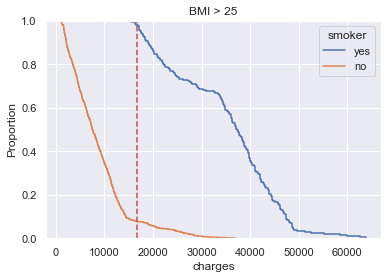

In [35]:
g=sns.ecdfplot(data=df_insurance[df_insurance.bmi>25], x='charges', hue='smoker', complementary=True)
plt.axvline(16700,color='r',ls='--')
plt.title('BMI > 25')
plt.show()

## Pengujian hipotesis

### Hipotesis 1: Tagihan perokok lebih besar dari tagihan non-perokok

Berdasarkan analisis sebelumnya, kita menemukan bahwa besar tagihan pengguna sangat dipengaruhi oleh apakah dia perokok atau bukan. Berdasarkan nilai rata-rata kedua kelompok, perokok memiliki tagihan yang lebih besar dibanding non-perokok.

In [38]:
df_insurance.groupby(['smoker'])['charges'].mean()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

- H0 : Rata-rata tagihan perokok lebih kecil sama dengan tagihan non-perokok
- H1 : Rata-rata tagihan perokok lebih besar dari tagihan non-perokok

alpha = 0.05

c:\Users\azuka\Anaconda3\envs\base-analysis\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\azuka\Anaconda3\envs\base-analysis\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


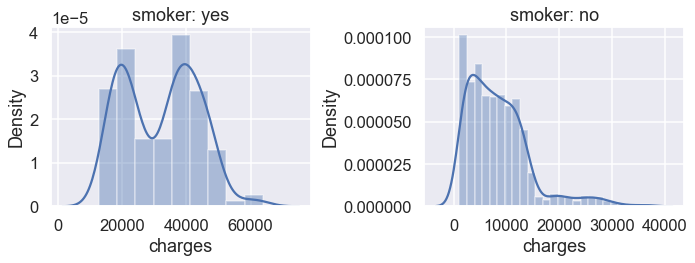

In [223]:
fig,ax = plt.subplots(1,2,figsize=(10,4))
for i,j in enumerate(df_insurance.smoker.unique()):
    plt.subplot(1,2,i+1)
    sns.distplot(df_insurance[df_insurance.smoker==j].charges)
    plt.title(f"smoker: {j}")
plt.tight_layout()

In [224]:
alpha = 0.05
_, p_val = stats.mannwhitneyu(df_insurance[df_insurance.smoker=='yes'].charges,df_insurance[df_insurance.smoker=='no'].charges,alternative='greater')

print(p_val)
if p_val < alpha:
    print('H0 ditolak, H1 diterima: Tagihan perokok lebih besar dari non-perokok')
else: print('Tidak cukup bukti untuk menolak H0: Tagihan perokok lebih kecil sama dengan tagihan non-perokok')

2.6351167222517853e-130
H0 ditolak, H1 diterima: Tagihan perokok lebih besar dari non-perokok


### Hipotesis 2: Tagihan pengguna dengan BMI di atas 25 lebih besar daripada tagihan pengguna dengan BMI di bawah 25

In [56]:
df_insurance.groupby(['label_bmi_2'])['charges'].mean()

label_bmi_2
BMI < 25    10284.290025
BMI > 25    13946.476035
Name: charges, dtype: float64

c:\Users\azuka\Anaconda3\envs\base-analysis\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\azuka\Anaconda3\envs\base-analysis\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


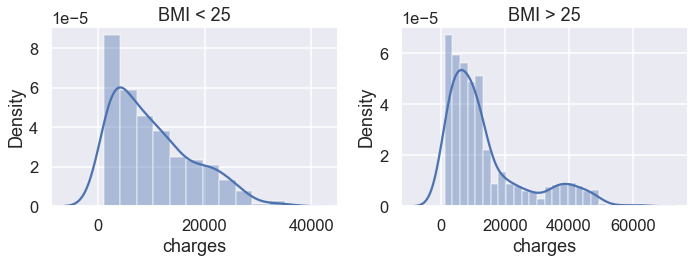

In [225]:
fig,ax = plt.subplots(1,2,figsize=(10,4))
for i,j in enumerate(sorted(df_insurance.label_bmi_2.unique())):
    plt.subplot(1,2,i+1)
    sns.distplot(df_insurance[df_insurance.label_bmi_2==j].charges)
    plt.title(f"{j}")
plt.tight_layout()

- H0 : Rata-rata tagihan pengguna dengan BMI > 25 lebih kecil sama dengan tagihan pengguna dengan BMI < 25
- H1 : Rata-rata tagihan pengguna dengan BMI > 25 lebih besar dari tagihan pengguna dengan BMI < 25

alpha = 0.05

In [226]:
alpha = 0.05
_, p_val = stats.mannwhitneyu(df_insurance[df_insurance.label_bmi_2=='BMI > 25'].charges,df_insurance[df_insurance.label_bmi_2=='BMI < 25'].charges,alternative='greater')

print(p_val)
if p_val < alpha:
    print('H0 ditolak, H1 diterima: Tagihan pengguna dengan BMI > 25 lebih besar dari pengguna dengan BMI < 25')
else: print('Tidak cukup bukti untuk menolak H0: Tagihan pengguna dengan BMI > 25 lebih kecil sama dengan tagihan pengguna dengan BMI < 25')

0.0035273819902691727
H0 ditolak, H1 diterima: Tagihan pengguna dengan BMI > 25 lebih besar dari pengguna dengan BMI < 25


### Hipotesis 3: BMI perempuan dan laki-laki sama

- H0 : Rata-rata BMI perempuan sama dengan rata-rata BMI laki-laki
- H1 : Rata-rata BMI perempuan tidak sama dengan rata-rata BMI laki-laki

alpha = 0.05

c:\Users\azuka\Anaconda3\envs\base-analysis\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\azuka\Anaconda3\envs\base-analysis\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


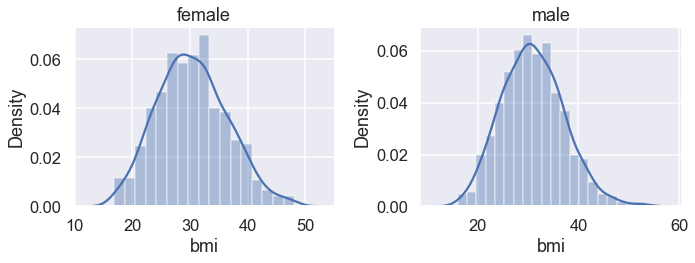

In [227]:
fig,ax = plt.subplots(1,2,figsize=(10,4))
for i,j in enumerate(sorted(df_insurance.sex.unique())):
    plt.subplot(1,2,i+1)
    sns.distplot(df_insurance[df_insurance.sex==j].bmi)
    plt.title(f"{j}")
plt.tight_layout()

In [228]:
alpha = 0.05
_, p_val, __ = sm.stats.ttest_ind(df_insurance[df_insurance.sex=='female'].bmi, df_insurance[df_insurance.sex=='male'].bmi)

print(p_val)
if p_val < alpha:
    print('H0 ditolak, H1 diterima: Rata-rata BMI perempuan tidak sama dengan rata-rata BMI laki-laki')
else: print('Tidak cukup bukti untuk menolak H0: Rata-rata BMI perempuan sama dengan rata-rata BMI laki-laki')

0.08997637178984322
Tidak cukup bukti untuk menolak H0: Rata-rata BMI perempuan sama dengan rata-rata BMI laki-laki
